In [1]:
import pandas as pd

# 'overall_df' is going to come from a data file we make when we get all of the columns we want to use
# write bigger dataframe
df = pd.read_csv('movehubqualityoflife.csv').drop(columns=['Rank','Rank.1'])
#print(df.columns)

df2 = pd.read_csv('HFI.csv'
  ).drop(columns=[
       'year', # only using 2017
       'Unnamed: 0'] # using dataframes to create other dataframes creates this 'Unnamed' column for the frame's orig index, then adds its own new index
  ).rename(columns={'countries':'Country'}) # column name consistency

#print(df2)
df2.head()

,Country,hf_score,hf_rank
0,New Zealand,8.88,1
1,Switzerland,8.82,2
2,Hong Kong,8.81,3
3,Canada,8.65,4
4,Australia,8.62,5


In [2]:
# introduction ------------------------------------------------------------------------------------
print("This script is designed to take user input regarding their opinions on factors involved in their ideal quality of life.",
"The script will use this information to aggregate a 'score' regarding the fitness of each city, listing the top and bottom five.")

# match countries between df and df2 ----------------------------------------------------------------

## create columns from df2
for name in (df2.columns):
  if name in df.columns: pass
  else: df[name] = 0.0

for i in range(0,len(df)):
  #print(df.iloc[i].hf_score)
  value = df2.loc[df2.Country == df.iloc[i].Country]
  #print(value)
  #print(float(value.hf_score))
  try: df.loc[i,'hf_score'] = float(value.hf_score)
  except: pass
  try: df.loc[i,'hf_rank'] = int(value.hf_rank)
  except: pass
  print('\r'+str(i+1)+' out of '+str(len(df))+' complete',end='')
print('Loading complete')

This script is designed to take user input regarding their opinions on factors involved in their ideal quality of life. The script will use this information to aggregate a 'score' regarding the fitness of each city, listing the top and bottom five.
216 out of 216 completeLoading complete


In [3]:
df.to_csv('homestretch.csv')

# ask for user input ----------------------------------------------------------
overall_df = pd.read_csv('homestretch.csv').drop(columns=['Unnamed: 0','lat','lng','hf_rank','Country'])
#print(overall_df.columns)

using = list(overall_df.columns)
using.remove('City')
#print(using)
print('\n')
for index in using:
  inp = input(f'How much do you value {index} on a scale from 1 to 10?\t')
  overall_df[index] = int(inp)*overall_df[index]
overall_df['End Total'] = 0.0

# end total score column ----------------------------------------------------------------------------
for i in range(0,len(overall_df)):
  sum = 0.0
  for element in overall_df.iloc[i]:
    try: sum += element
    except: pass
  overall_df.loc[i,'End Total'] = sum

#overall_df['End Total Score'] =
# sum the values in each index (i.e. column) for each city (i.e. row), then rank the cities by total value; return a ranked list
# e.g. Ulaanbaatar totals at 400, Sao Paulo at 300, Gaborone at 200; therefore, 1,2,3

overall_df.to_csv('final_prod.csv')
working_df = pd.read_csv('final_prod.csv').sort_values('End Total',ascending=False).set_index('End Total')
#print(working_df)
print("Your top 5 suggested cities are: ")
print(working_df.City.head())
print("Your top 5 LEAST suggested cities are: ")
print(working_df.City.tail())



How much do you value Movehub Rating on a scale from 1 to 10?	5
How much do you value Purchase Power on a scale from 1 to 10?	6
How much do you value Health Care on a scale from 1 to 10?	4
How much do you value Pollution on a scale from 1 to 10?	8
How much do you value Quality of Life on a scale from 1 to 10?	9
How much do you value Crime Rating on a scale from 1 to 10?	7
How much do you value hf_score on a scale from 1 to 10?	8
Your top 5 suggested cities are: 
End Total
3043.73       Dallas
3023.87    Baltimore
2938.06    Cape Town
2923.33     Lausanne
2912.55      Orlando
Name: City, dtype: object
Your top 5 LEAST suggested cities are: 
End Total
1517.52    Lahore
1493.55    Bogota
1479.86     Quito
1372.33      Baku
1143.25     Hanoi
Name: City, dtype: object


In [10]:
overall_df.head()

,City,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,hf_score,End_Total
0,London,500.00,319.02,278.12,463.60,431.01,350.98,67.76,2410.49
1,Dubai,492.20,417.84,271.12,246.48,766.44,135.52,49.04,2378.64
2,Paris,479.60,282.48,333.32,473.44,473.58,376.25,64.16,2482.83
3,Perth,476.90,372.66,322.24,188.24,671.58,350.07,68.96,2450.65
4,Sydney,472.65,328.92,285.08,147.84,668.88,229.60,68.96,2201.93


In [12]:
#replace white spaces with underscore('_')
overall_df.columns = [label.replace(' ', '_') for label in overall_df.columns]
overall_df.head()

,City,Movehub_Rating,Purchase_Power,Health_Care,Pollution,Quality_of_Life,Crime_Rating,hf_score,End_Total
0,London,500.00,319.02,278.12,463.60,431.01,350.98,67.76,2410.49
1,Dubai,492.20,417.84,271.12,246.48,766.44,135.52,49.04,2378.64
2,Paris,479.60,282.48,333.32,473.44,473.58,376.25,64.16,2482.83
3,Perth,476.90,372.66,322.24,188.24,671.58,350.07,68.96,2450.65
4,Sydney,472.65,328.92,285.08,147.84,668.88,229.60,68.96,2201.93


# Visualisations of the data

Text(0, 0.5, 'End_Total')

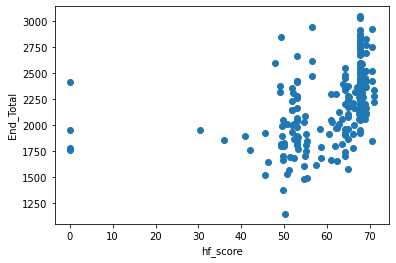

In [29]:
plt.scatter(overall_df['hf_score'], overall_df['End_Total'])
plt.xlabel('hf_score')
plt.ylabel('End_Total')

### From the plot above, we can see that a high hf_score results in a high End_Total as well

Text(0, 0.5, 'Quality_of_Life')

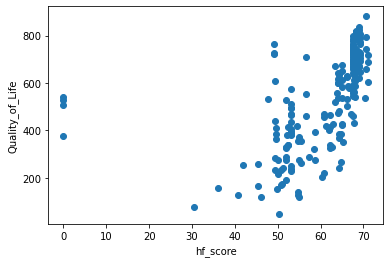

In [31]:
import matplotlib.pyplot as plt
plt.scatter(overall_df['hf_score'], overall_df['Quality_of_Life'])
plt.xlabel('hf_score')
plt.ylabel('Quality_of_Life')

In [14]:
#From this data we can see that Quality of living and the hf_score are correlated. A high hf score means there is good quality of living

<Figure size 2160x2160 with 0 Axes>

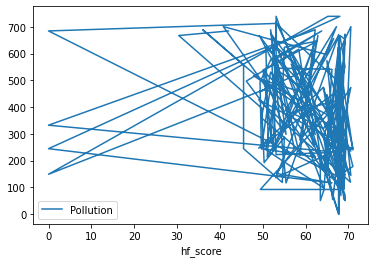

In [23]:
plt.figure(figsize=(30,30))
overall_df.plot('hf_score', 'Pollution')
plt.show()

Text(0, 0.5, 'Pollution')

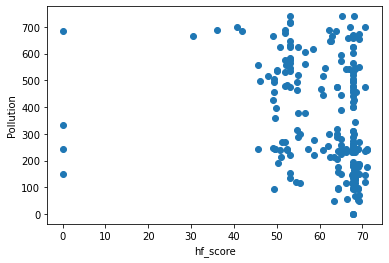

In [22]:
plt.scatter(overall_df['hf_score'], overall_df['Pollution'])
plt.xlabel('hf_score')
plt.ylabel('Pollution')

<AxesSubplot:>

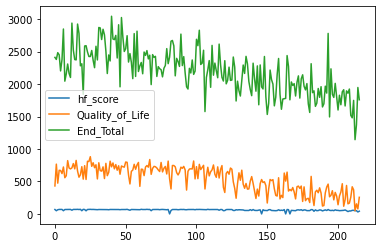

In [35]:
overall_df[['hf_score', 'Quality_of_Life', 'End_Total']].plot()

<AxesSubplot:>

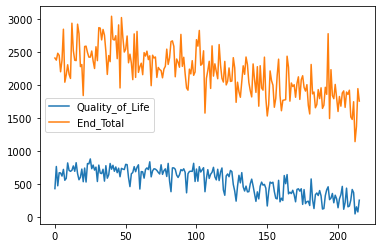

In [36]:
overall_df[['Quality_of_Life', 'End_Total']].plot()

<AxesSubplot:xlabel='hf_score'>

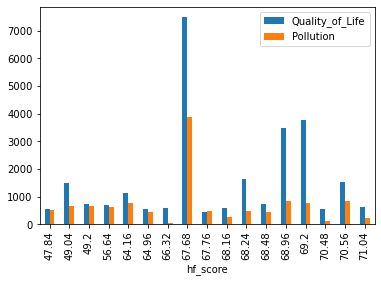

In [71]:
#creating a subset of the data with the first 40 rows
df_bar = overall_df.iloc[:39,:]
df_bar = df_bar.groupby(['hf_score']).sum()
df_bar[['Quality_of_Life', 'Pollution']].plot.bar()

### From this we can see that the hf_score of 67.68 has the highest Quality of Life and the highest Pollution

City
Abu Dhabi        AxesSubplot(0.125,0.125;0.775x0.755)
Adelaide         AxesSubplot(0.125,0.125;0.775x0.755)
Atlanta          AxesSubplot(0.125,0.125;0.775x0.755)
Auckland         AxesSubplot(0.125,0.125;0.775x0.755)
Austin           AxesSubplot(0.125,0.125;0.775x0.755)
Berlin           AxesSubplot(0.125,0.125;0.775x0.755)
Brisbane         AxesSubplot(0.125,0.125;0.775x0.755)
Brussels         AxesSubplot(0.125,0.125;0.775x0.755)
Calgary          AxesSubplot(0.125,0.125;0.775x0.755)
Cape Town        AxesSubplot(0.125,0.125;0.775x0.755)
Doha             AxesSubplot(0.125,0.125;0.775x0.755)
Dubai            AxesSubplot(0.125,0.125;0.775x0.755)
Dublin           AxesSubplot(0.125,0.125;0.775x0.755)
Edmonton         AxesSubplot(0.125,0.125;0.775x0.755)
Hong Kong        AxesSubplot(0.125,0.125;0.775x0.755)
Houston          AxesSubplot(0.125,0.125;0.775x0.755)
Las Vegas        AxesSubplot(0.125,0.125;0.775x0.755)
Lausanne         AxesSubplot(0.125,0.125;0.775x0.755)
London           AxesSu

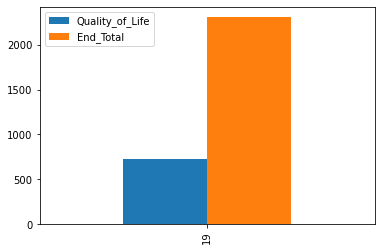

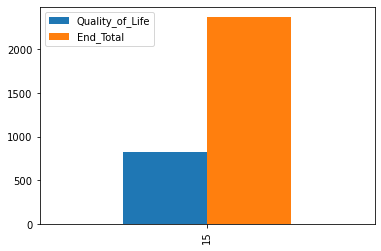

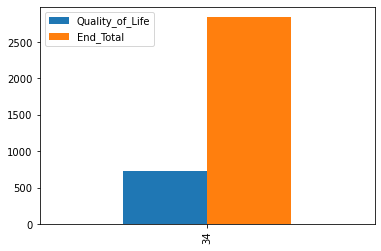

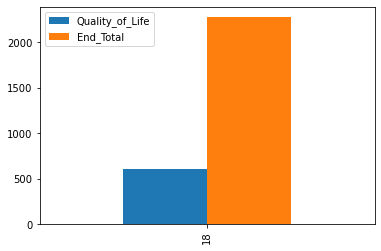

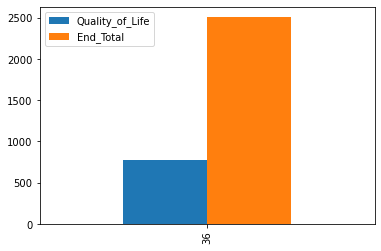

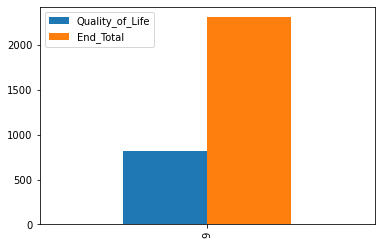

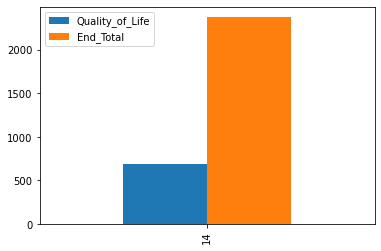

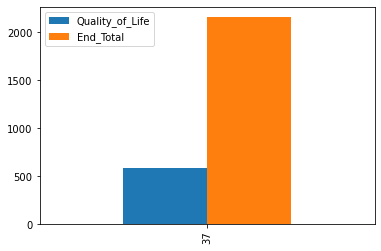

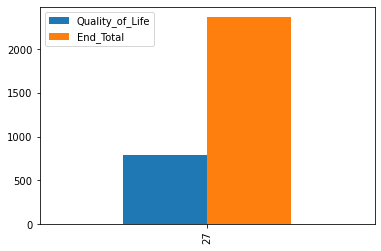

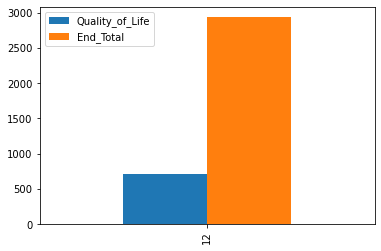

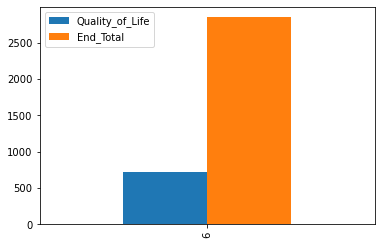

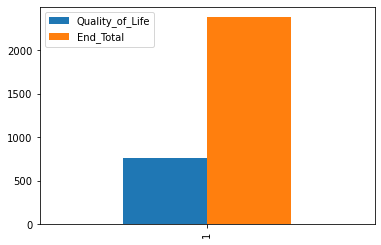

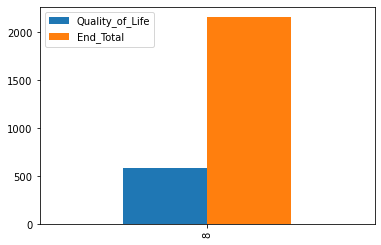

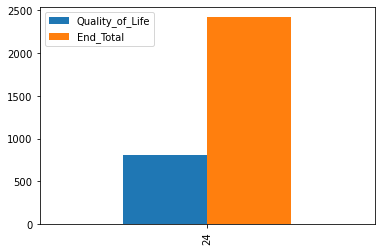

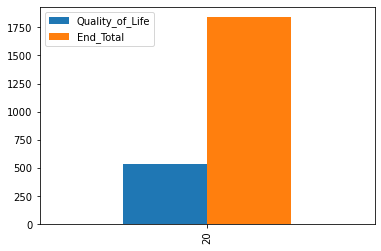

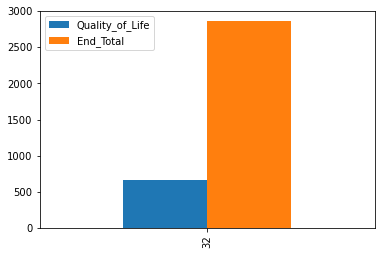

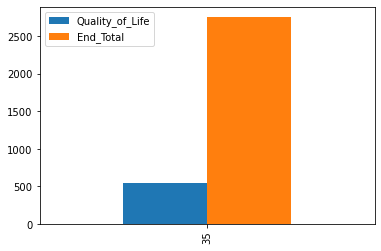

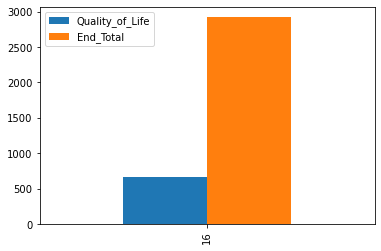

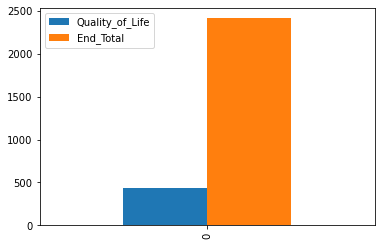

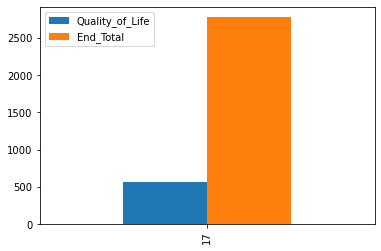

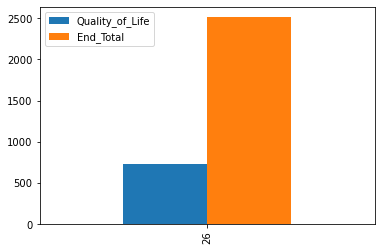

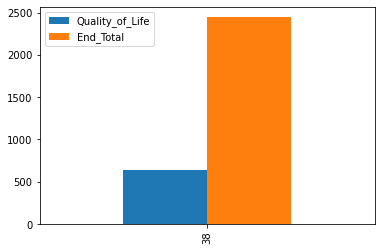

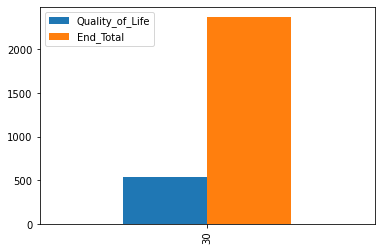

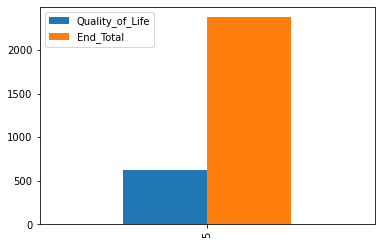

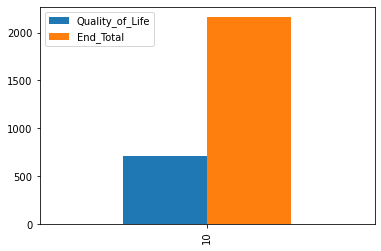

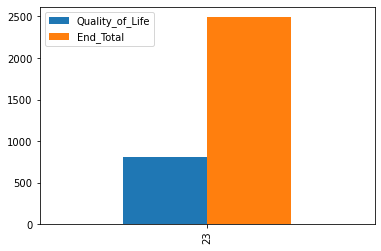

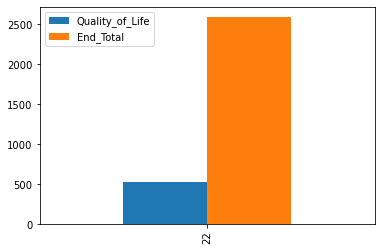

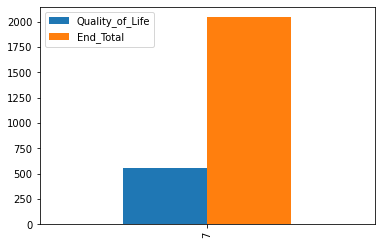

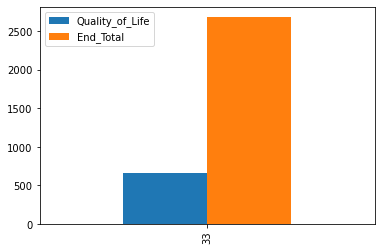

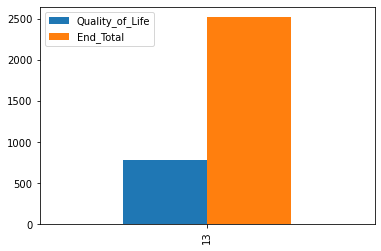

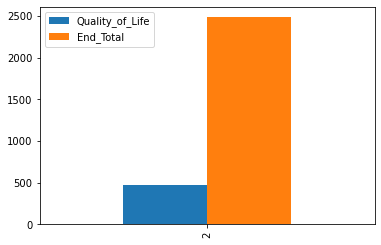

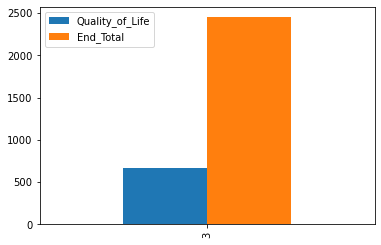

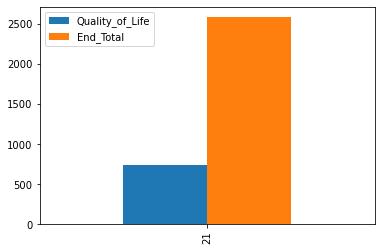

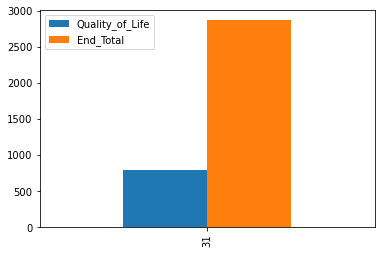

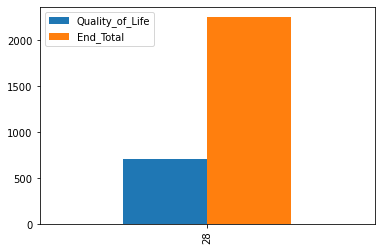

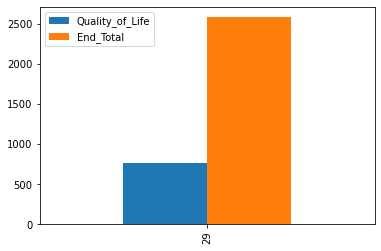

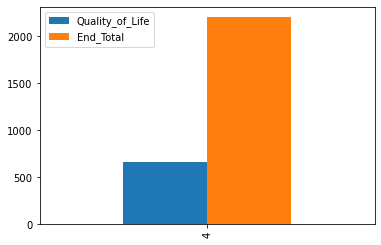

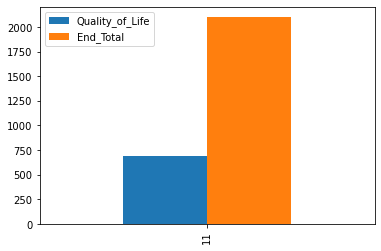

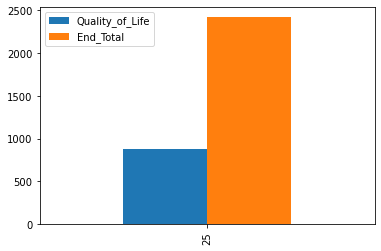

In [72]:
df_bar_city = overall_df.iloc[:39,:]
df_bar_city = df_bar_city.groupby(['City'])
df_bar_city[['Quality_of_Life', 'End_Total']].plot.bar()

<AxesSubplot:xlabel='hf_score'>

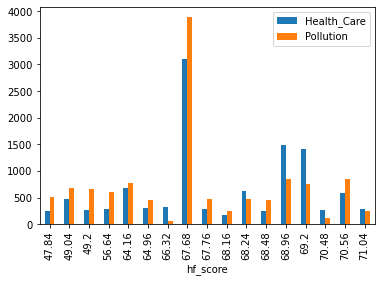

In [73]:
df_bar[['Health_Care', 'Pollution']].plot.bar()

### From this data we can see that the City with the Highest pollution has the highest health care. In most cases the pollution is higher than the healthcare, however this isn't the case for some.